In [10]:
import pandas as pd
import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

In [2]:
image_generator_train = ImageDataGenerator(
        rescale=1. / 255., 
        shear_range=0.1,
        zoom_range=0.3,
)
image_generator_test=ImageDataGenerator(
        rescale=1. / 255.,
)

train_data=image_generator_train.flow_from_directory('data/', 
        target_size=(500, 500),color_mode='grayscale', 
        class_mode='binary', batch_size= 5
)
test_data=image_generator_test.flow_from_directory('test_data/', 
        target_size=(500, 500),color_mode='grayscale', 
        class_mode='binary', batch_size= 5
)

Found 550 images belonging to 2 classes.
Found 74 images belonging to 2 classes.


In [3]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(500, 500, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),))   
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))   
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
          
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 249, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 64)       0

In [5]:
weights=compute_class_weight('balanced', classes=np.unique(train_data.classes), y=train_data.classes)
weights

array([1.39593909, 0.77903683])

In [6]:
class_weights = dict(zip(np.unique(train_data.classes), weights))
class_weights

{0: 1.3959390862944163, 1: 0.7790368271954674}

In [7]:
es = EarlyStopping(monitor='val_loss', mode = 'min', patience=10)
rlp =ReduceLROnPlateau(monitor='val_loss', actor=0.1, patience=10)
mcp=ModelCheckpoint('check_best_xray_model.h5', monitor= 'val_loss', mode='min', save_best_only=True)

In [ ]:
history=model.fit(train_data, steps_per_epoch=len(train_data), epochs=20, validation_data=test_data, callbacks=[es, rlp, mcp],class_weight=class_weights)

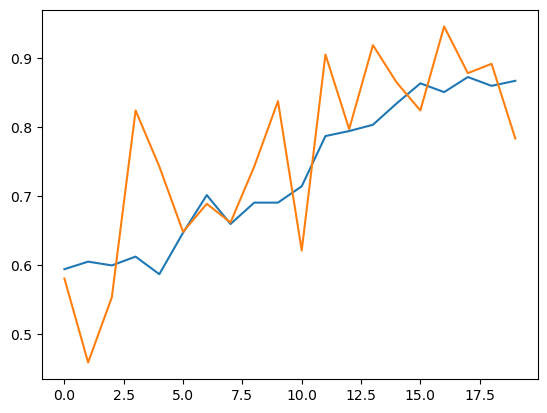

In [11]:
plt.plot(history.history['accuracy'], label= 'training accuracy')
plt.plot(history.history['val_accuracy'], label= 'validation accuracy')
